# Importing necessary libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
import sys

In [36]:
# Adding the path to the custom functions
sys.path.append('../src')
from functions import *

# Load the Data

In [37]:
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
# Setting display options
pd.set_option('display.max_columns', None)

In [38]:
# Convert and round numerical columns in df_control_final
numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 'total_time_visit']
df_control_final = convert_round(df_control_final, numerical_columns, float)

In [39]:
# Convert columns to appropriate dtypes in df_control_final
object_columns = ['client_id', 'visit_visitor_id', 'last_step', 'Variation', 'gendr']
df_control_final = convert_dtype(df_control_final, object_columns, object)

int_columns = ['bt_1', 'bt_2', 'bt_3', 'total_navigation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']
df_control_final = convert_dtype(df_control_final, int_columns, int)

df_control_final['date'] = pd.to_datetime(df_control_final['date'])
df_control_final['completion'] = df_control_final['completion'].astype(bool)

In [40]:
# Display data types
print(df_control_final.dtypes)

client_id                   object
visit_visitor_id            object
start_time                 float64
step_1                     float64
step_2                     float64
step_3                     float64
date                datetime64[ns]
bt_1                         int64
bt_2                         int64
bt_3                         int64
total_navigation             int64
last_step                   object
completion                    bool
total_time_visit           float64
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                        float64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object


# Categorical columns analysis

In [41]:
test_categorical_columns = ['last_step', 'gendr']
print(df_control_final.select_dtypes("object").columns)
print(df_control_final.select_dtypes("object").nunique().sort_values(ascending=False))

Index(['client_id', 'visit_visitor_id', 'last_step', 'Variation', 'gendr'], dtype='object')
visit_visitor_id    32181
client_id           23480
last_step               5
gendr                   3
Variation               1
dtype: int64


In [42]:
frequency_proportion(df_control_final, 'last_step')

Frequency:last_step
confirm    15336
start       9639
step_1      3498
step_3      2249
step_2      1459
Name: count, dtype: int64
Proportion: last_step
confirm    0.476554
start      0.299525
step_1     0.108698
step_3     0.069886
step_2     0.045337
Name: proportion, dtype: float64


In [43]:
tab_control_last_step = cross_table(df_control_final, 'last_step')
tab_control_last_step

,last_step,count
0,confirm,15336
1,start,9639
2,step_1,3498
3,step_2,1459
4,step_3,2249


In [44]:
frequency_proportion(df_control_final, 'gendr')

Frequency:gendr
M        11077
Other    10679
F        10425
Name: count, dtype: int64
Proportion: gendr
M        0.344209
Other    0.331842
F        0.323949
Name: proportion, dtype: float64


In [45]:
tab_control_gender = cross_table(df_control_final, 'gendr')
tab_control_gender

,gendr,count
0,F,10425
1,M,11077
2,Other,10679


# Calculate proportions and plot bar chart

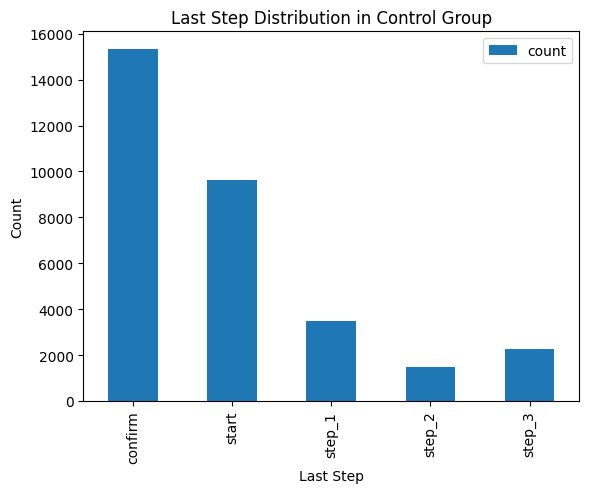

In [46]:
(tab_control_last_step['count'] / tab_control_last_step['count'].sum()).round(2)
tab_control_last_step.plot(x='last_step', y='count', kind='bar')
plt.xlabel('Last Step')
plt.ylabel('Count')
plt.title('Last Step Distribution in Control Group')
plt.show()


# Calculate proportions and plot pie chart

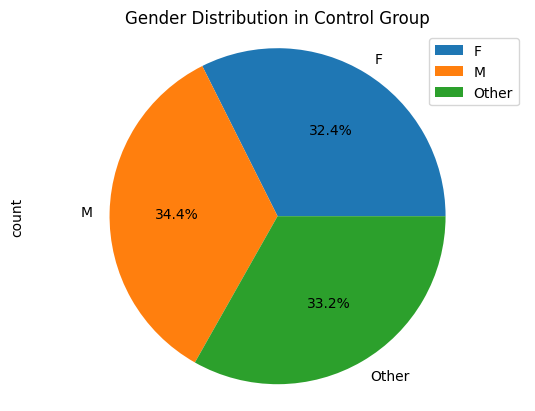

In [47]:
(tab_control_gender['count'] / tab_control_gender['count'].sum()).round(2)
tab_control_gender.plot.pie(y='count', labels=tab_control_gender['gendr'], autopct='%1.1f%%')
plt.title('Gender Distribution in Control Group')
plt.axis('equal')
plt.show()

# Numerical columns analysis

In [56]:
print(df_control_final.select_dtypes("number").columns)
control_numerical_columns = ['start_time', 'step_1', 'step_2', 'step_3', 
                             'bt_1', 'bt_2', 'bt_3', 'total_navigation', 
                             'total_time_visit', 'clnt_tenure_yr', 'clnt_tenure_mnth', 
                             'clnt_age', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_control_final.describe()

Index(['start_time', 'step_1', 'step_2', 'step_3', 'bt_1', 'bt_2', 'bt_3',
       'total_navigation', 'total_time_visit', 'clnt_tenure_yr',
       'clnt_tenure_mnth', 'clnt_age', 'num_accts', 'bal', 'calls_6_mnth',
       'logons_6_mnth'],
      dtype='object')


,start_time,step_1,step_2,step_3,date,bt_1,bt_2,bt_3,total_navigation,total_time_visit,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,32181.000000,32181.000000,32181.000000,32181.000000,32181,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,32181.000000,3.218100e+04,32181.000000,32181.000000
mean,1.233547,0.679618,1.155185,1.437580,2017-04-21 01:33:42.000559360,0.921569,0.804108,0.708089,0.508530,4.673618,12.347659,154.159691,48.462509,2.281470,1.632546e+05,3.335571,6.372021
min,0.000000,0.000000,0.000000,0.000000,2017-03-15 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,33.000000,17.000000,2.000000,2.378961e+04,0.000000,3.000000
25%,0.080000,0.000000,0.000000,0.000000,2017-04-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.370000,6.000000,82.000000,35.000000,2.000000,4.172055e+04,1.000000,4.000000
50%,0.280000,0.180000,0.650000,0.350000,2017-04-12 00:00:00,1.000000,1.000000,1.000000,0.000000,2.670000,11.000000,141.000000,50.000000,2.000000,7.024451e+04,3.000000,6.000000
75%,0.800000,0.620000,1.570000,1.530000,2017-05-05 00:00:00,1.000000,1.000000,1.000000,0.000000,5.680000,16.000000,196.000000,61.000000,2.000000,1.543138e+05,6.000000,9.000000
max,699.280000,268.300000,362.720000,121.130000,2017-06-20 00:00:00,16.000000,24.000000,24.000000,20.000000,699.420000,55.000000,669.000000,96.000000,7.000000,8.292996e+06,6.000000,9.000000
std,5.622046,2.856195,2.865317,3.419863,NaN,0.814567,0.853594,0.809779,1.261946,8.828963,7.046790,84.174236,15.796989,0.563948,3.148661e+05,2.192798,2.180042


# Plot histograms for numerical columns

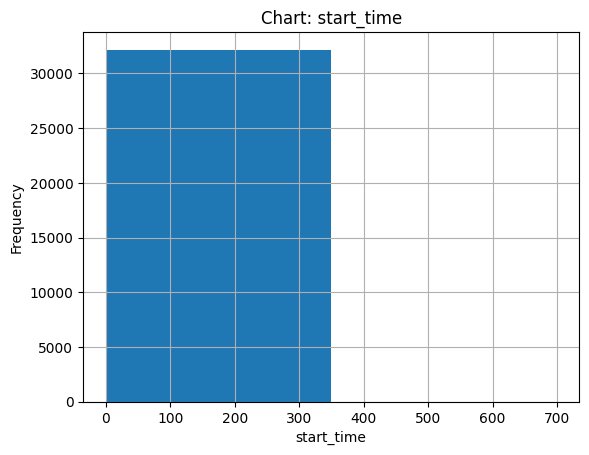

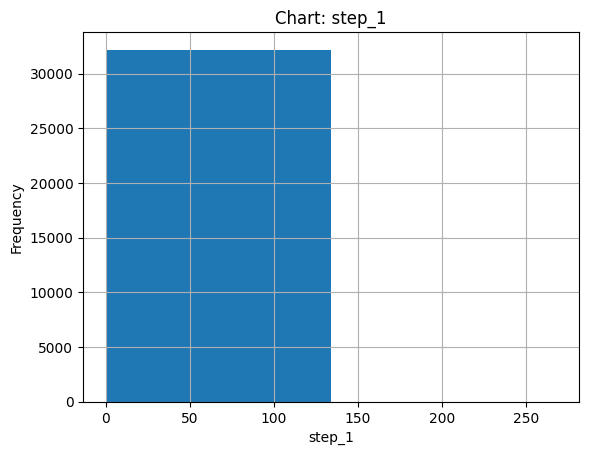

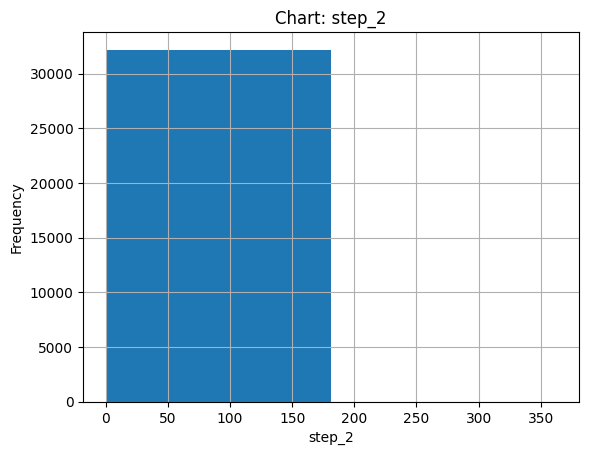

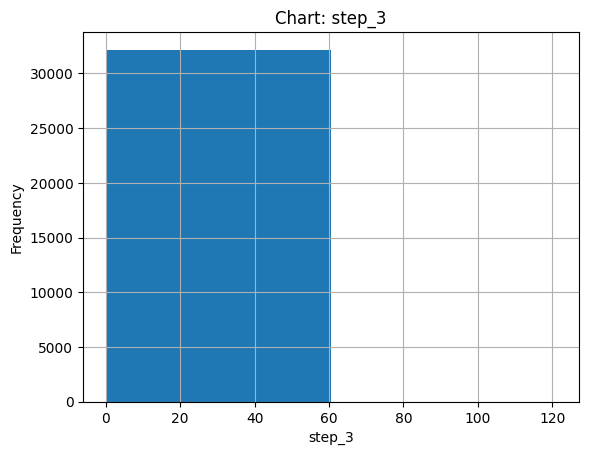

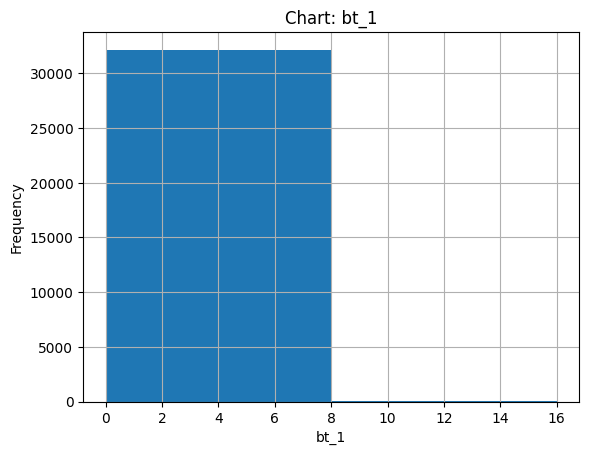

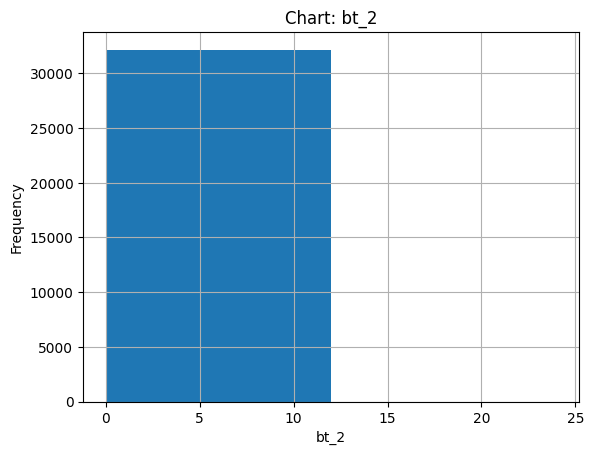

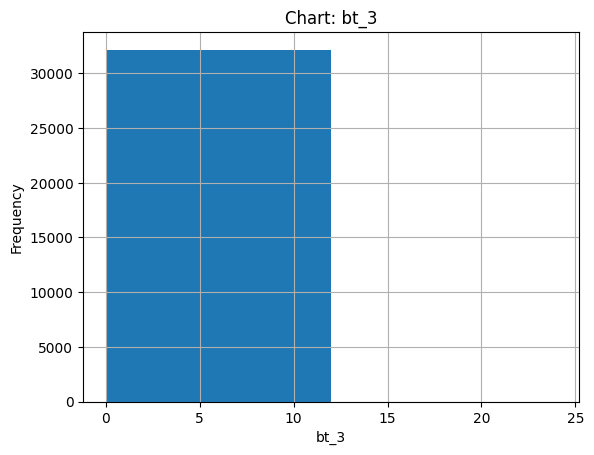

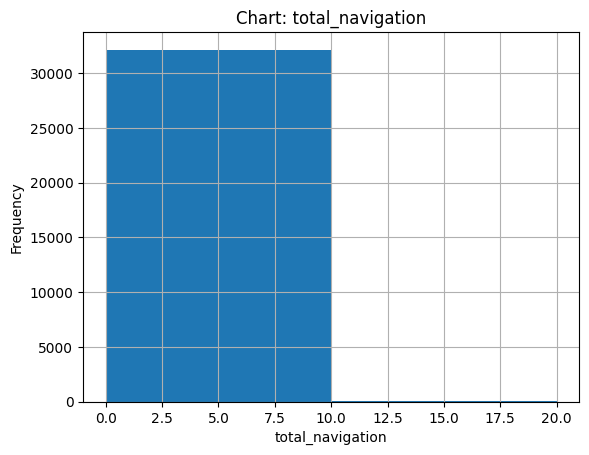

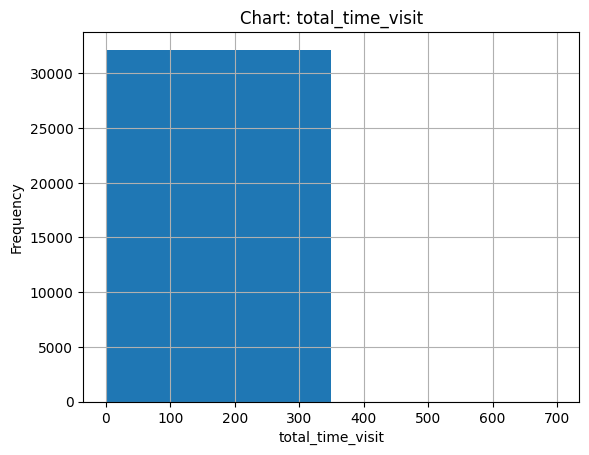

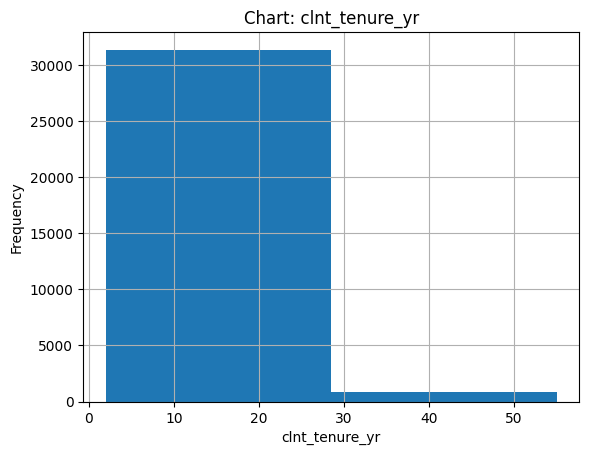

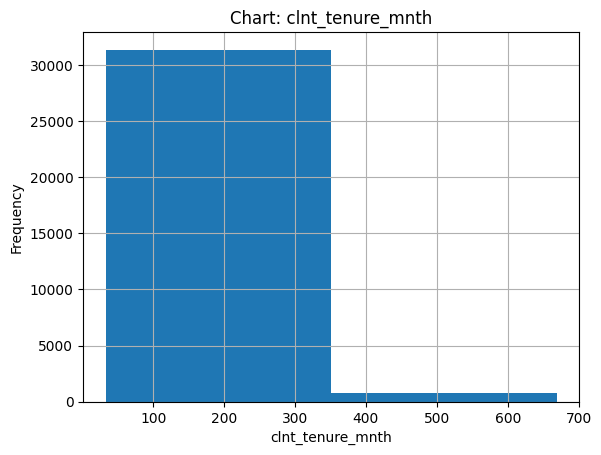

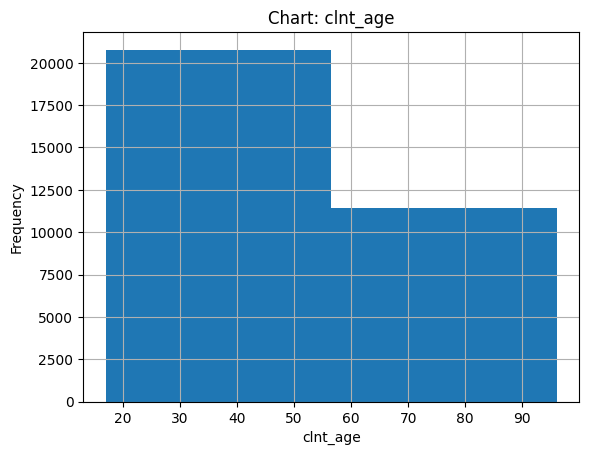

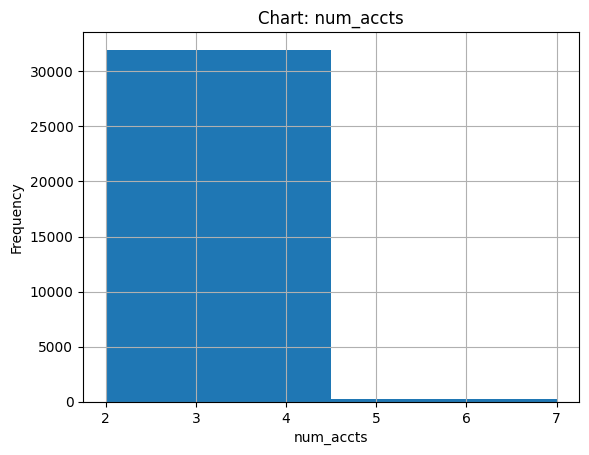

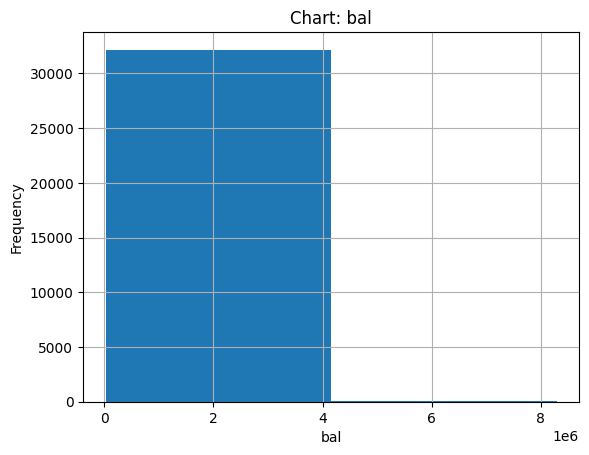

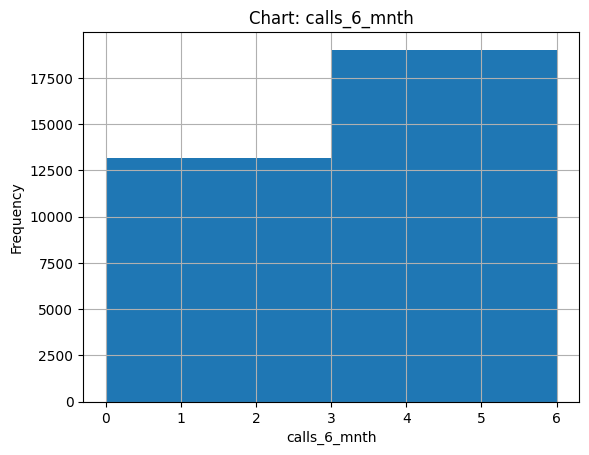

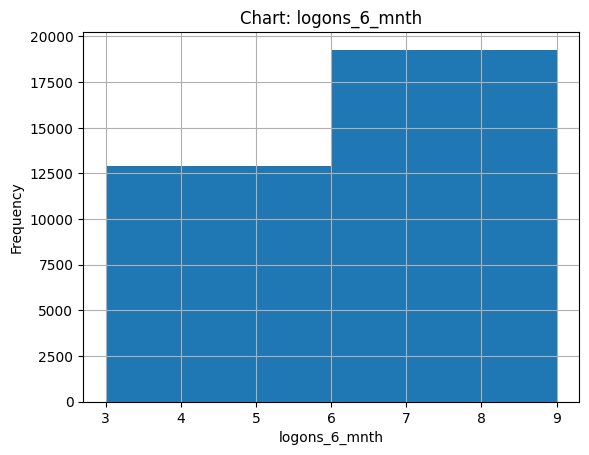

In [60]:
for column in control_numerical_columns:
    plt.figure()
    df_control_final[column].hist(bins=2)
    plt.title(f'Chart: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Check for outliers with box plots

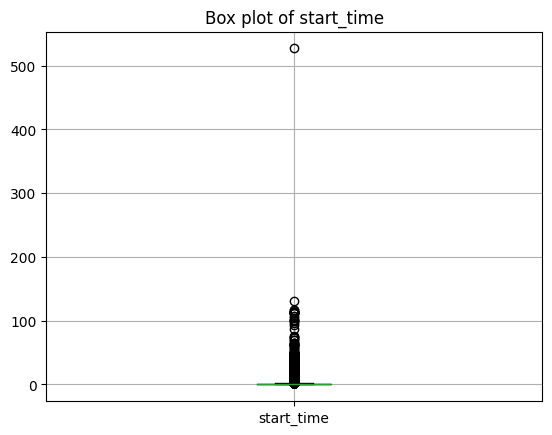

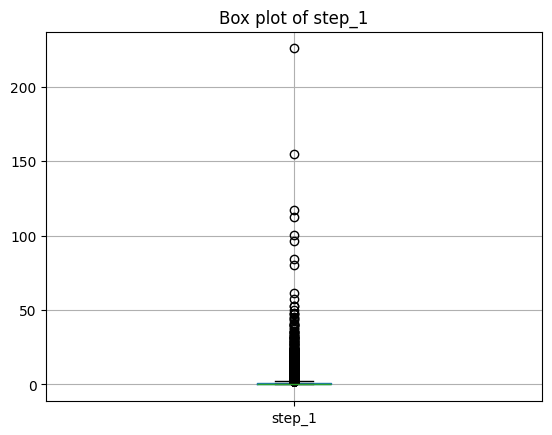

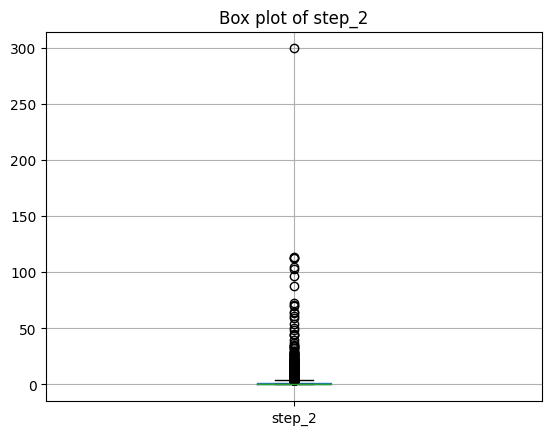

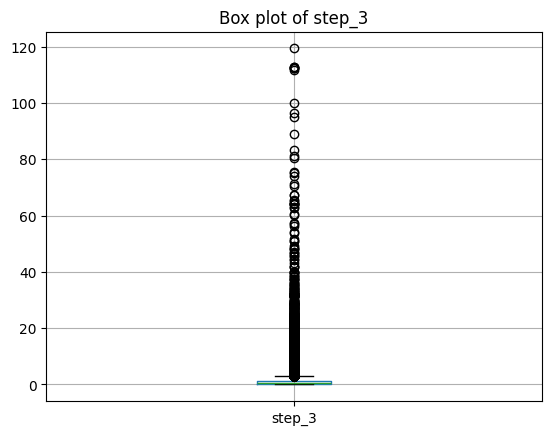

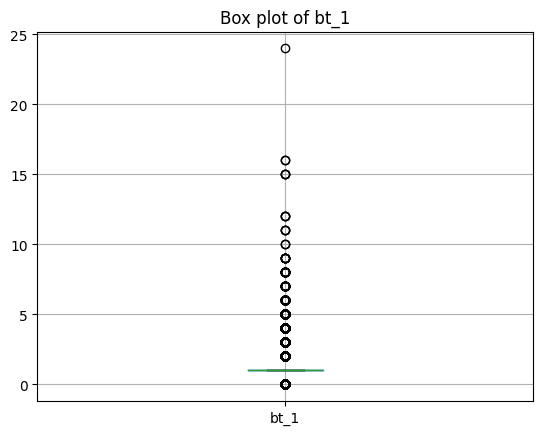

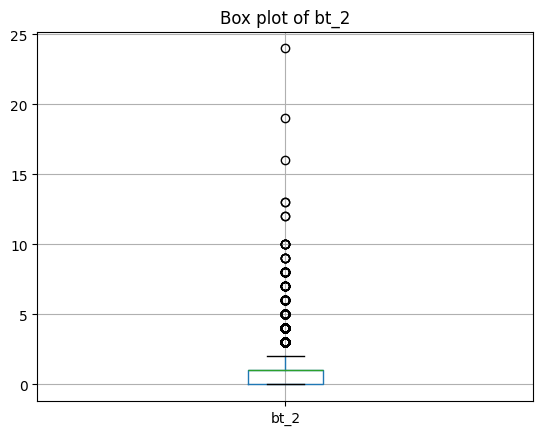

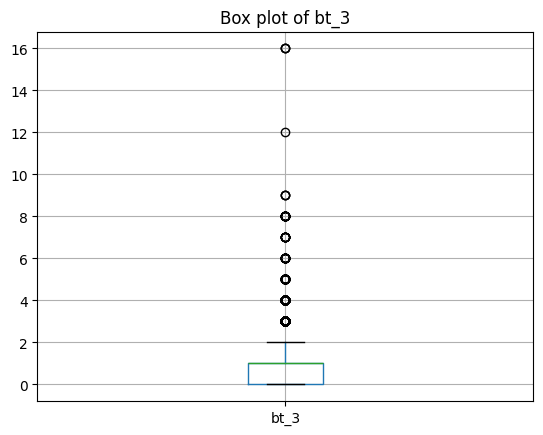

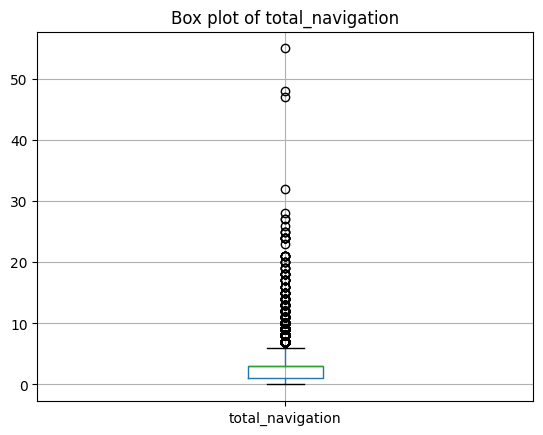

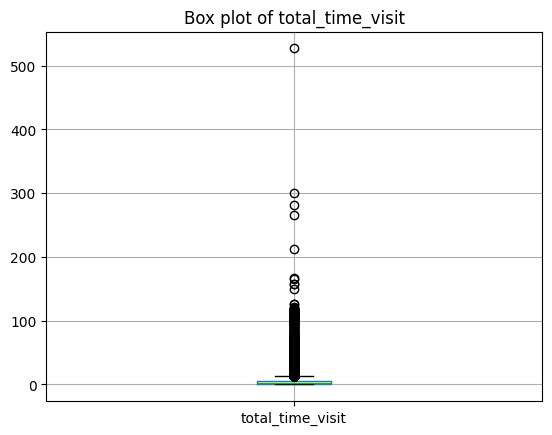

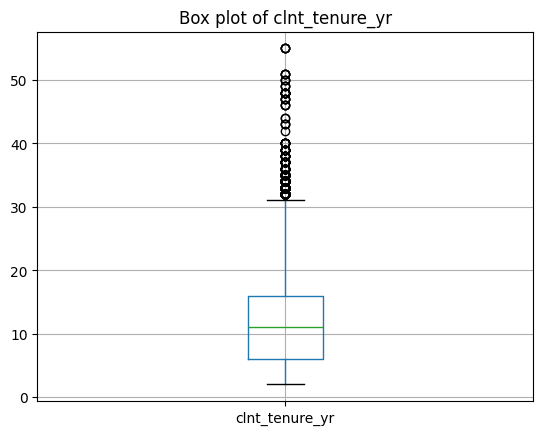

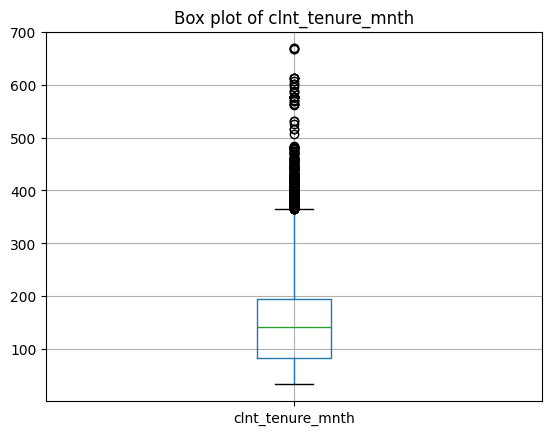

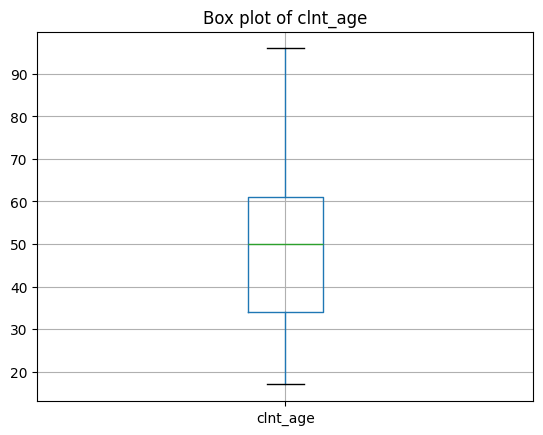

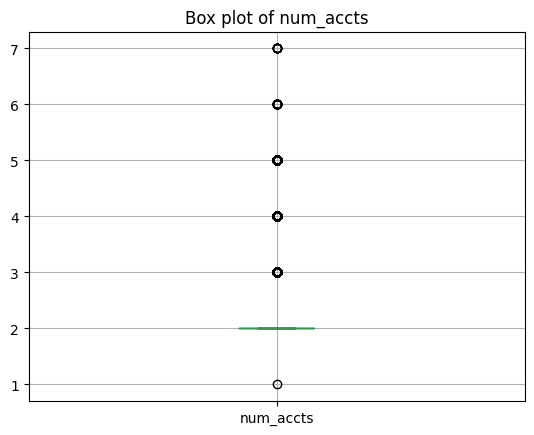

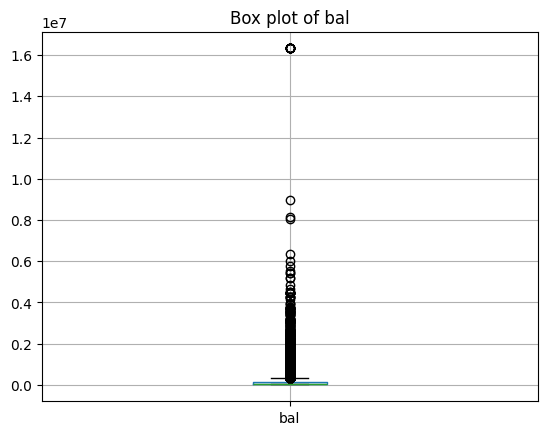

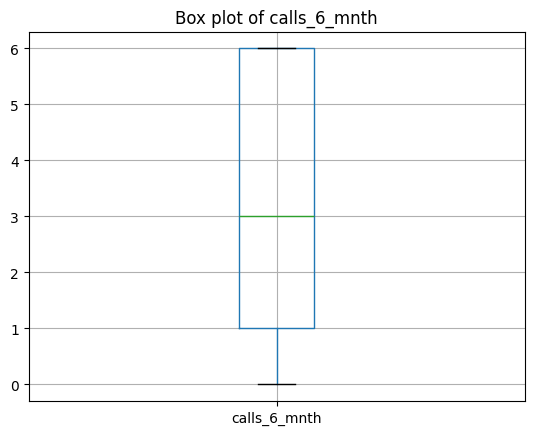

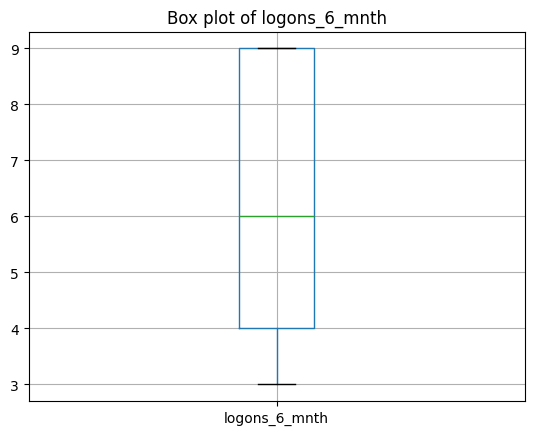

In [50]:
for column in control_numerical_columns:
    plt.figure()
    df_test_final.boxplot(column=column)
    plt.title(f'Box plot of {column}')
    plt.show()

In [51]:
# Repeat the same process for df_test_final

# Convert and round numerical columns in df_test_final

In [52]:
df_test_final = convert_round(df_test_final, numerical_columns, float)

# Convert columns to appropriate dtypes in df_test_final

In [53]:
df_test_final = convert_dtype(df_test_final, object_columns, object)
df_test_final = convert_dtype(df_test_final, int_columns, int)

df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_test_final['completion'] = df_test_final['completion'].astype(bool)

In [54]:
# Display data types
print(df_test_final.dtypes)

client_id                   object
visit_visitor_id            object
start_time                 float64
step_1                     float64
step_2                     float64
step_3                     float64
date                datetime64[ns]
bt_1                         int64
bt_2                         int64
bt_3                         int64
total_navigation             int64
last_step                   object
completion                    bool
total_time_visit           float64
Variation                   object
clnt_tenure_yr               int64
clnt_tenure_mnth             int64
clnt_age                     int64
gendr                       object
num_accts                    int64
bal                        float64
calls_6_mnth                 int64
logons_6_mnth                int64
dtype: object


In [55]:
# Categorical columns analysis for df_test_final
print(df_test_final.select_dtypes("object").columns)
print(df_test_final.select_dtypes("object").nunique().sort_values(ascending=False))
frequency_proportion(df_test_final, 'last_step')
frequency_proportion(df_test_final, 'gendr')

Index(['client_id', 'visit_visitor_id', 'last_step', 'Variation', 'gendr'], dtype='object')
visit_visitor_id    37122
client_id           26912
last_step               5
gendr                   3
Variation               1
dtype: int64
Frequency:last_step
confirm    21435
start       9448
step_1      3136
step_3      1782
step_2      1321
Name: count, dtype: int64
Proportion: last_step
confirm    0.577420
start      0.254512
step_1     0.084478
step_3     0.048004
step_2     0.035585
Name: proportion, dtype: float64
Frequency:gendr
M        12642
Other    12309
F        12171
Name: count, dtype: int64
Proportion: gendr
M        0.340553
Other    0.331582
F        0.327865
Name: proportion, dtype: float64
